<a href="https://colab.research.google.com/github/Ayodeleky/PHYS-4061/blob/main/PHYS_4061_L5FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Think About It**
1. **What are the allowed values of J and 5S and 5P states of rubidium?**
ANS: Since L=1 the allowed J states are
J= 1/2
J= 3/2

2. **This figure is called an energy level diagram, but splittings are noted in frequency. How does one convert from frequency to energy units?**
ANS: We can use the relation E= hc/λ
where h= 6.626 x 10-34

3. **What wavelength of light corresponds to the 5s to 5p energy splitting?**
ANS: Red light

4. **What are the allowed F values for the 5S1/2, 5P1,2 and 5P3/2 states of 85Rb?**
ANS: Since F= J+I
5S½ = 2,3
5P½ = 2,3
5P3/2= 1,2,3,4
5. **Given the above selection rules, and the energy level diagram, list all allowable electric-dipole transitions.**
ANS:
Selection rules tell us that we can only have 
∆S= 0

∆J= 0, ±1

6. **What are the most probable speed for a room temperature distribution of Rubidium?**
ANS:
Using the equation,
v= sqrt(2xRxT/M)
where,
R= 8.3144598 J/molxK
T= 293 K

v= 7.550 m/s

7. What doppler shift does this correspond to for our 380 THz laser?
ANS:
This corresponds to a doppler shift of 9.893 GHz



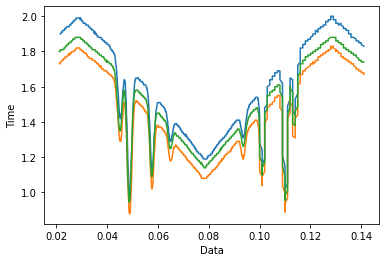

[0.0216 0.0217 0.0218 ... 1.83   1.83   1.83  ]


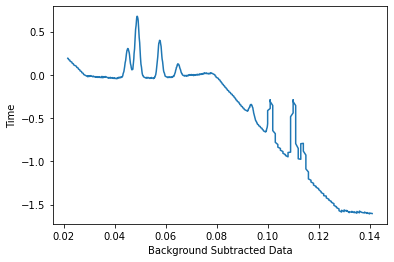

In [3]:
#PHYS 4061 Lab 5 Results
import numpy as np
import csv
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats

t_arr = []
data = []
data_2= []
data_sub = []
t_sub = []
t_1= []   
t_2 = []

with open("ex.1 lab 4.csv") as csv_file:
  csv_reader= csv.reader(csv_file,delimiter=",")
  line_count = 0
  for row in csv_reader:
    t_arr.append(float(row[0]))
    data.append(float(row[1]))


with open("ex.2 background signal.csv") as csv_file_bg:
  csv_reader_bg= csv.reader(csv_file_bg, delimiter=",")
  line_count=0
  for row in csv_reader_bg:
    t_2.append(float(row[0]))
    data_2.append(float(row[1]))

with open("ex.3 subtracting ch.1 and ch.2.csv") as csv_file_bg:
  csv_reader_bg= csv.reader(csv_file_bg, delimiter=",")
  line_count=0
  for row in csv_reader_bg:
    t_sub.append(float(row[0]))
    data_sub.append(float(row[1]))


plt.plot(t_arr,data)
plt.plot(t_2,data_2)
plt.plot(t_sub,data_sub, label= 'Exercise 1 Data')
plt.xlabel("Data")
plt.ylabel("Time")
plt.show()

ex_1 = np.append(t_arr,data)
print(ex_1)
#m= -5.15
#b=1.78
m= -15.625
b= 2.4290625

y = [(m*t) + b for t in t_arr]
subtract_data= []
subtract_data= np.subtract(y,data)
plt.plot(t_arr,subtract_data)
plt.xlabel('Background Subtracted Data')
plt.ylabel('Time')
plt.show()



In [4]:
def Gauss(x,y0, a, x0, sigma):
    return y0+a * np.exp(-(x - x0)**2 / (2 * sigma**2))


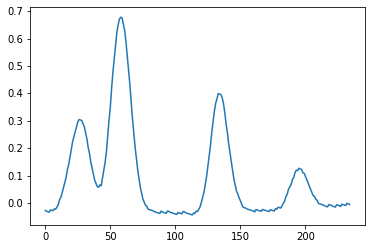

235
45


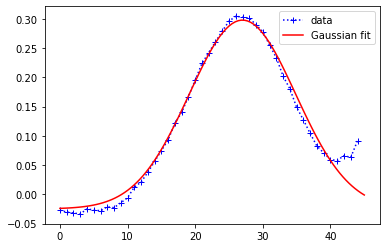

In [6]:
## Fitting Peak 1 to a Guassion:
from scipy.optimize import curve_fit

## Starting by finding the range for all the peaks
full_range= subtract_data[175:410]
plt.plot(full_range)
plt.show()
print(len(full_range))

## Finding the specific range for the 1st peak
peak_1= subtract_data[175:220]
print(len(peak_1))

#The number of data points for peak 1 is 45

#Now we can use the data from above to fit the data of peak 1 to a Guassian
x = np.arange(45)
xx = np.linspace(0, 45, 100)
y_peak = peak_1
mean = sum(x * y_peak) / sum(y_peak)
sigma = np.sqrt(sum(y_peak * (x - mean)**2) / sum(y_peak))

popt,pcov = curve_fit(Gauss, x, y_peak, p0=[5000,max(y_peak), mean, sigma])

plt.plot(x, y_peak, 'b+:', label='data')
plt.plot(xx, Gauss(xx, *popt), 'r-', label='Gaussian fit')
plt.legend()
plt.show()

50


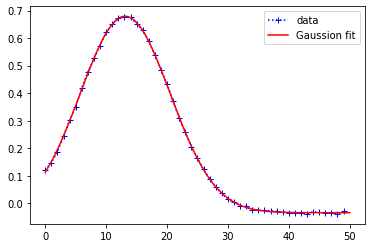

In [10]:
## Fitting peak 2 to Gaussion

## We start by finding the specific range for the 2nd peak
peak_2= subtract_data[220:270]
print(len(peak_2))

#The number of data points for peak 2 is 55

#Now we can use the data from above to fit the data of peak 2 to a Guassian
x_2 = np.arange(50)
xx_2 = np.linspace(0, 50, 500)
y2_peak = peak_2
# weighted arithmetic mean (corrected - check the section below)
mean_2 = sum(x_2 * y2_peak) / sum(y2_peak)
sigma_2 = np.sqrt(sum(y2_peak * (x_2 - mean_2)**2) / sum(y2_peak))


popt,pcov = curve_fit(Gauss, x_2, y2_peak, p0=[5000,max(y2_peak), mean_2, sigma_2])

plt.plot(x_2, y2_peak, 'b+:', label='data')
plt.plot(xx_2, Gauss(xx_2, *popt), 'r-', label='Gaussion fit')
plt.legend()
plt.show()

35


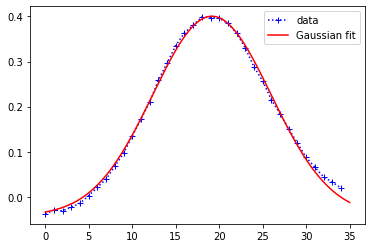

In [9]:

## Fitting peak 3 to Gaussion
## Finding the specific range for the 3rd peak
peak_3= subtract_data[290:325]
print(len(peak_3))

# There are 55 data points in peak 3
#Now we can use the data from above to fit the data of peak 2 to a Guassian
x = np.arange(35)
xx = np.linspace(0, 35, 500)
y_peak = peak_3
# weighted arithmetic mean (corrected - check the section below)
mean = sum(x * y_peak) / sum(y_peak)
sigma = np.sqrt(sum(y_peak * (x - mean)**2) / sum(y_peak))


popt,pcov = curve_fit(Gauss, x, y_peak, p0=[1000,max(y_peak), mean, sigma])

plt.plot(x, y_peak, 'b+:', label='data')
plt.plot(xx, Gauss(xx, *popt), 'r-', label='Gaussian fit')
plt.legend()
plt.show()




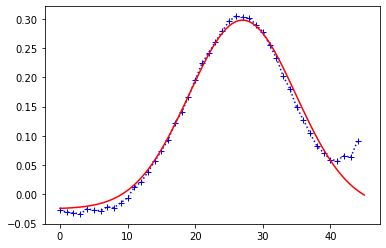

In [8]:
popt,pcov = curve_fit(Gauss, x, y_peak, p0=[1000,max(y_peak), mean, sigma])

plt.plot(x, y_peak, 'b+:', label='data')
plt.plot(xx, Gauss(xx, *popt), 'r-', label='Gaussian fit')


500

35


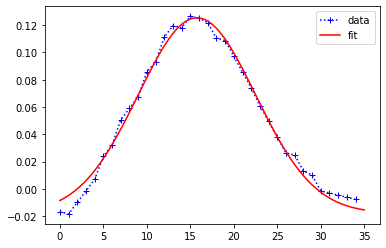

In [8]:
# Fitting peak 4 to Gaussian
## Finding the specific range for the 4th peak
peak_4= subtract_data[355:390]
print(len(peak_4))

#There are 35 data points in peak 4

#Now we can use the data from above to fit the data of peak 2 to a Guassian
x_4 = np.arange(35)
xx_4 = np.linspace(0, 35, 500)
y4_peak = peak_4
mean_4 = sum(x_4 * y4_peak) / sum(y4_peak)
sigma_4 = np.sqrt(sum(y4_peak * (x_4 - mean_4)**2) / sum(y4_peak))

# def Gauss(x42,y0, a, x0, sigma_4):
#     return y0+a * np.exp(-(x_4 - x0)**2 / (2 * sigma_4**2))


popt,pcov = curve_fit(Gauss, x_4, y4_peak, p0=[5000,max(y4_peak), mean_4, sigma_4])

plt.plot(x_4, y4_peak, 'b+:', label='data')
plt.plot(xx_4, Gauss(xx_4, *popt), 'r-', label='fit')
plt.legend()
plt.show()

[2664000.0, 2640000.0, 2604000.0, 2580000.0, 2556000.0, 2520000.0, 2496000.0, 2460000.0, 2436000.0, 2412000.0, 2388000.0, 2352000.0, 2328000.0, 2292000.0, 2268000.0, 2244000.0, 2208000.0, 2184000.0, 2160000.0, 2136000.0, 2100000.0, 2075999.9999999998, 2040000.0000000002, 2016000.0000000002, 1992000.0, 1956000.0, 1932000.0, 1908000.0, 1872000.0, 1848000.0, 1824000.0, 1788000.0, 1764000.0, 1739999.9999999998, 1703999.9999999998, 1680000.0000000002, 1656000.0000000002, 1620000.0, 1596000.0, 1572000.0, 1536000.0, 1512000.0, 1488000.0, 1452000.0, 1428000.0]


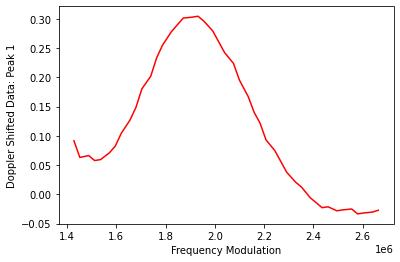

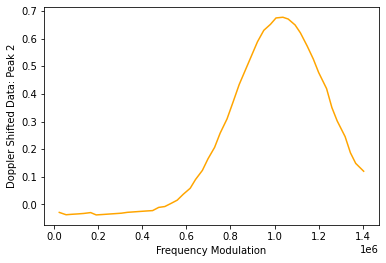

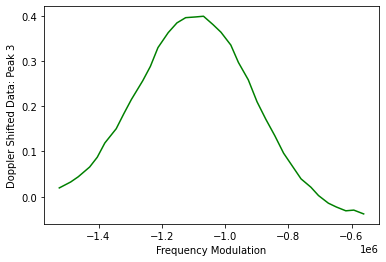

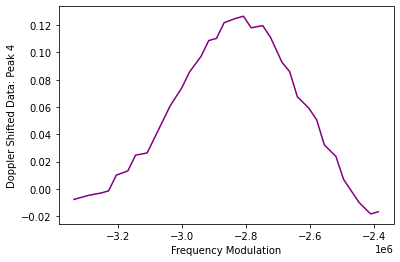

In [31]:
## Now we can plot each peak against the voltage modulation at the specific data points 
## For peak 1 we have:
import csv

volt_mod=[]

with open("ex.1 lab 4.csv") as csv_file:
  csv_reader= csv.reader(csv_file,delimiter=",")
  line_count = 0
  for row in csv_reader:
    t_arr.append(float(row[0]))
    data.append(float(row[1]))
    volt_mod.append(float(row[2]))

eta= 12000000
volt_range_1= volt_mod[175:220]
volt_range_2=volt_mod[220:270]
volt_range_3= volt_mod[290:325]
volt_range_4= volt_mod[355:390]

eta_volt = [i * eta for i in volt_range_1]
print(eta_volt)
plt.plot(eta_volt,peak_1,'red')
plt.xlabel('Frequency Modulation')
plt.ylabel('Doppler Shifted Data: Peak 1')
plt.show()

eta_volt_2 = [i * eta for i in volt_range_2]
plt.plot(eta_volt_2,peak_2,'orange')
plt.xlabel('Frequency Modulation')
plt.ylabel('Doppler Shifted Data: Peak 2')
plt.show()

eta_volt_3 = [i * eta for i in volt_range_3]
plt.plot(eta_volt_3,peak_3,'green')
plt.xlabel('Frequency Modulation')
plt.ylabel('Doppler Shifted Data: Peak 3')
plt.show()

eta_volt_4 = [i * eta for i in volt_range_4]
plt.plot(eta_volt_4,peak_4,'purple')
plt.xlabel('Frequency Modulation')
plt.ylabel('Doppler Shifted Data: Peak 4')
plt.show()

Here we can see the Doppler shifted peaks for peaks 1-4, where the background subtracted data is plotted against the frequency modulation, (which was converted using volt_mod and eta_volt).
In comparison, if we look at the section above we can see the original graph for the background subtracted data against the voltage modulation.


In [34]:
from math import log, sqrt

c= 2.9*10**8
#k= 1.380649*10**-23
R= 8.31446261815324
#m_Rb=1.4192261*10**-25
M= 85.4678
temp= 293.15
ln= 2*log(2)

f_0= max(eta_volt)
doppler_shift= (2*f_0/c)*sqrt((ln)*(R*temp/M))
print('The doppler shift for peak 1 is:', doppler_shift)

f_2= max(eta_volt_2)
doppler_shift_2= (2*f_2/c)*sqrt((ln)*(R*temp/M))
print('The doppler shift for peak 2 is:', doppler_shift_2)

f_3= max(eta_volt_3)

doppler_shift_3= (2*f_3/c)*sqrt((ln)*(R*temp/M))
print('The doppler shift for peak 3 is:', doppler_shift_3)

f_4= max(eta_volt_4)
doppler_shift_4= (2*f_4/c)*sqrt((ln)*(R*temp/M))
print('The doppler shift for peak 4 is:', doppler_shift_4)


The doppler shift for peak 1 is: 0.11551934715853791
The doppler shift for peak 2 is: 0.06088181809706728
The doppler shift for peak 3 is: -0.02435272723882691
The doppler shift for peak 4 is: -0.10355112650697769


In [22]:
## Peak 2 is our largest absorption feature, hence we will use peak 2 to determine the number density of Rubidum atoms
from math import log, log10, exp, e, pow, sqrt
I_0= 1
I_L= 0.01
L= 0.07
cross_sec= 1.4*(10**-16)
diff= log(I_L/I_0)
num_dens= abs(diff/(cross_sec*L))
print("The numer density of Rubidium atoms is:",num_dens,'m^-3')

#Now we will use the ideal gas law to calculate the pressure of rubidium
R= 8.31446261815324
Vol=0.38808
temp= 293.15
Pressure= (num_dens*R*temp)/Vol
print('The pressure of Rubidium inside the cell is calculated to be:',Pressure,'Pa')


The numer density of Rubidium atoms is: 4.699153251008256e+17 m^-3
The pressure of Rubidium inside the cell is calculated to be: 2.9513616559867623e+21 Pa


In [ ]:
#Determine hyperfine splitting of the 5S1/2 states for both Rb(85) and Rb(87) and compare to accepted values

#The accepted values for the hyperfine splitting of the 5 1/2 states are given as:
## Rb 87 - 3035.73 MHz
## Rb 85 - 6834.68 MHz

## Peak 1 = Rb 85
## Peak 2 = Rb 87